In [3]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy import log
# from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

In [39]:
df = pd.read_csv('./cleaned_data.csv')
# df = np.log(df['close'].values)
df = np.log(df['close'].values)

In [35]:
# df = df[:20000]

In [40]:
# result = adfuller(np.diff(df))
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

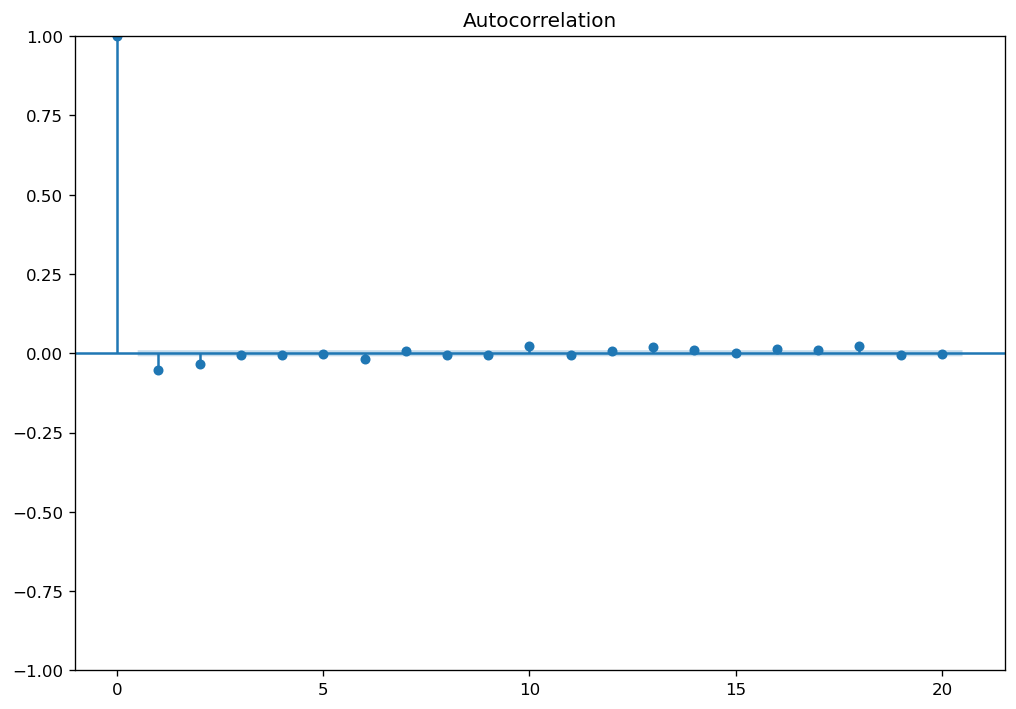

In [41]:
sm.graphics.tsa.plot_acf(np.diff(df), lags=20, alpha=0.05)
plt.show()

C:\Users\Athra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


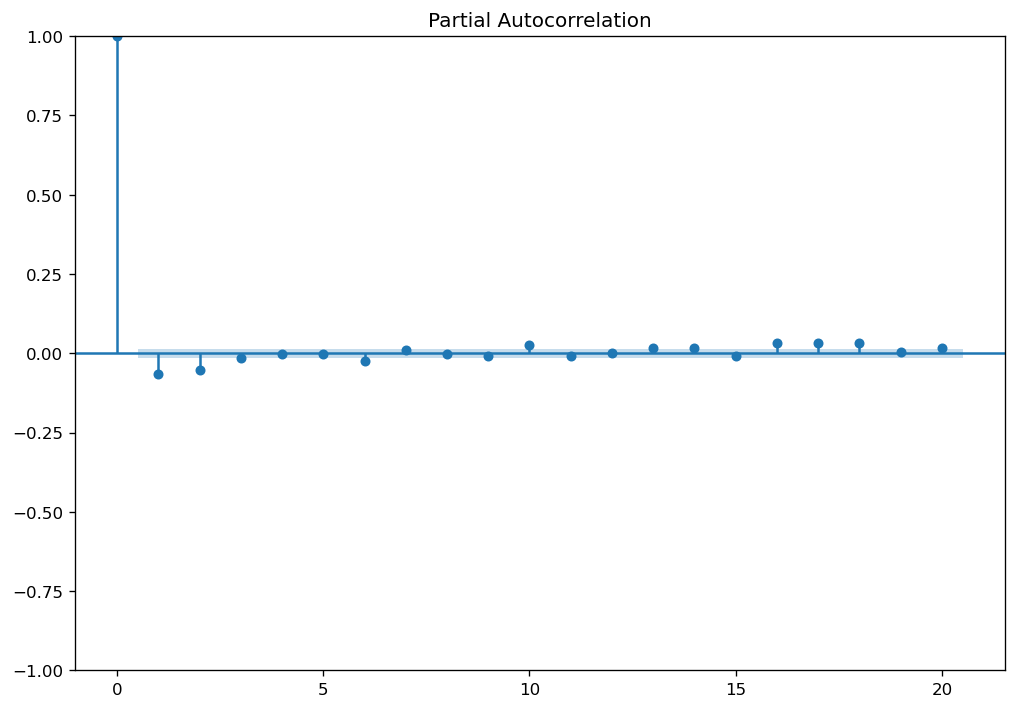

In [38]:
sm.graphics.tsa.plot_pacf(np.diff(df), lags=20, alpha=0.05)
plt.show()

In [6]:
# scaler = MinMaxScaler()
train = df[:-15]
test = df[-15:]
# train = train.reshape(-1,1)
# test = test.reshape(-1,1)
# scaler = scaler.fit(train)
# train_normalized = scaler.transform(train).squeeze()
# test_normalized = scaler.transform(test).squeeze()
train_normalized = train

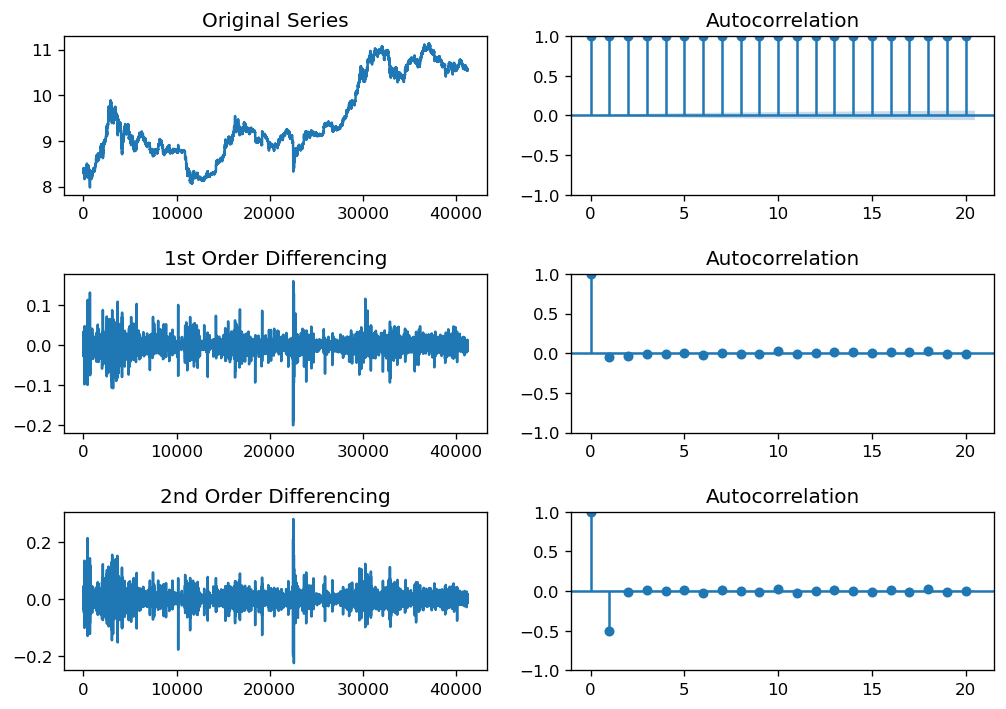

In [8]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
axes[0, 0].plot(train_normalized)
axes[0, 0].set_title('Original Series')
sm.graphics.tsa.plot_acf(train_normalized, ax=axes[0, 1], lags=20)


# 1st Differencing
axes[1, 0].plot(np.diff(train_normalized))
axes[1, 0].set_title('1st Order Differencing')
sm.graphics.tsa.plot_acf(np.diff(train_normalized), ax=axes[1, 1],lags=20)


# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(train_normalized)))
axes[2, 0].set_title('2nd Order Differencing')
sm.graphics.tsa.plot_acf(np.diff(np.diff(train_normalized)), ax=axes[2, 1],lags=20)

plt.show()


C:\Users\Athra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Athra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Athra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


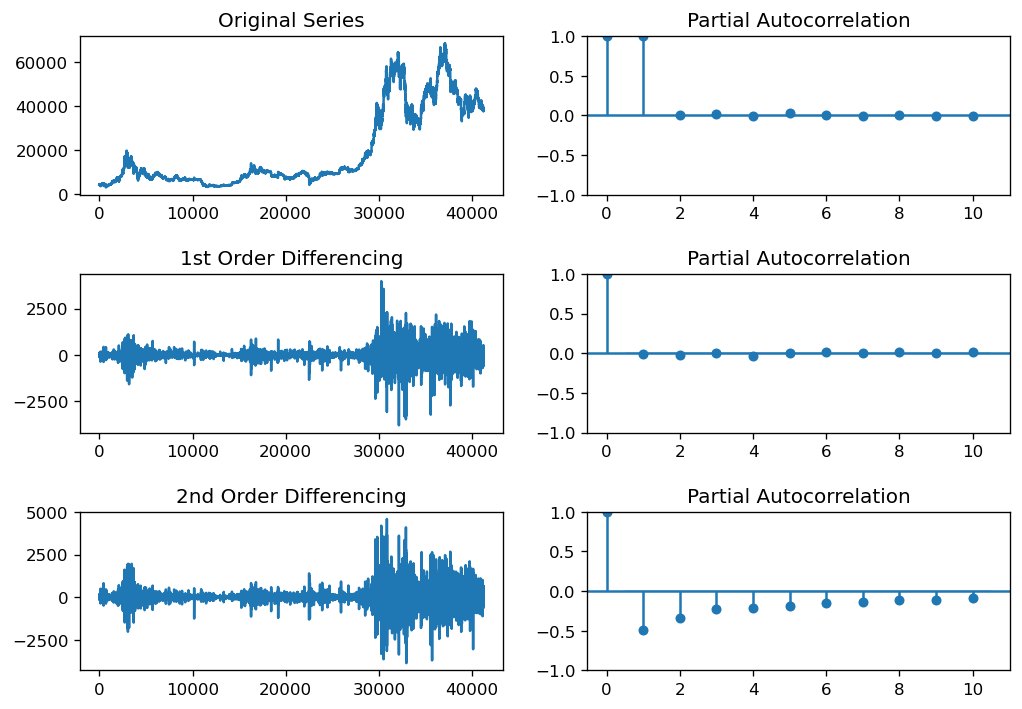

In [12]:
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2)
# axes[0].plot(np.diff(train_normalized)) 
# axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
# plot_pacf(np.diff(train_normalized), ax=axes[1], lags=20)

# plt.show()
lag =10
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
axes[0, 0].plot(train_normalized)
axes[0, 0].set_title('Original Series')
plot_pacf(train_normalized, ax=axes[0, 1], lags=lag)


# 1st Differencing
axes[1, 0].plot(np.diff(train_normalized))
axes[1, 0].set_title('1st Order Differencing')
plot_pacf(np.diff(train_normalized), ax=axes[1, 1],lags=lag)


# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(train_normalized)))
axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(np.diff(np.diff(train_normalized)), ax=axes[2, 1],lags=lag)

plt.show()

In [7]:
#ARIMA
model = ARIMA(train_normalized, order=(1,1,1), seasonal_order=(1, 1, 1, 7))
# model = ARIMA(train_normalized, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                               y   No. Observations:                41262
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood             -280344.788
Date:                         Sun, 09 Oct 2022   AIC                         560699.577
Time:                                 23:01:01   BIC                         560742.714
Sample:                                      0   HQIC                        560713.211
                                       - 41262                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9624      0.014     69.835      0.000       0.935       0.989
ma.L1         -0.9658      0.013    -73.093      0.000      -0.992      -0.940
ar.S.L7       -0.0003      0.002     -0.152      0.879      -0.005       0.004
ma.S.L7       -0.9998      0.000  -3653.392      0.000      -1.000      -0.999
sigma2      4.672e+04     85.317    547.555      0.000    4.65e+04    4.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):           1440144.28
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              10.16   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

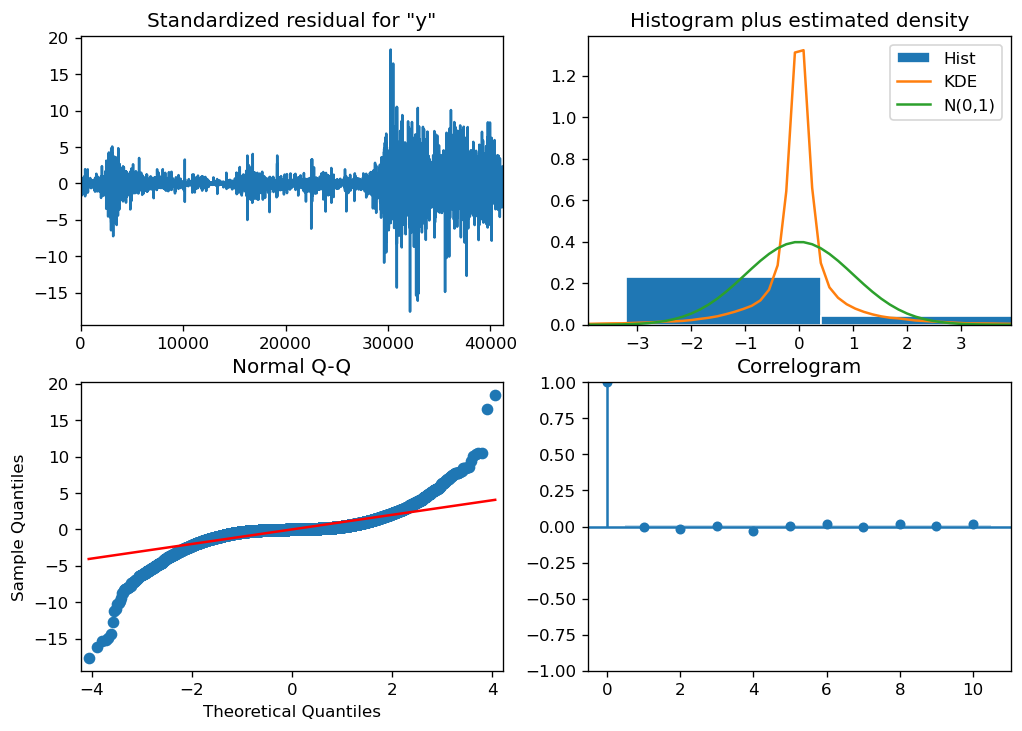

In [8]:
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':120})
model_fit.plot_diagnostics()
plt.show()

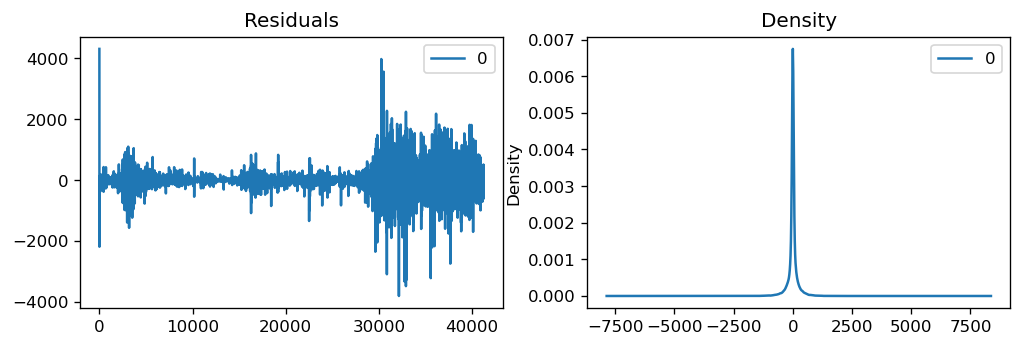

In [9]:
plt.rcParams.update({'figure.figsize':(10,3)})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [10]:
fc = model_fit.forecast(15, alpha=0.05)

In [11]:
# forecast, conf = fc.predicted_mean, fc.conf_int()
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

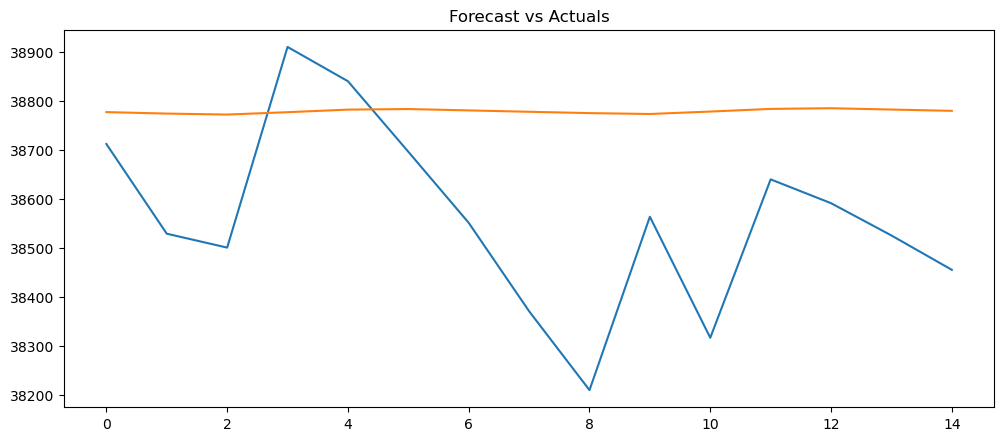

In [12]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.show()

## AUTO ARIMA ##

In [65]:
threshold = -96
df = pd.read_csv('./cleaned_data.csv')
df_ = df['close'].values
# df_ = df['close'].values

train = df_[:threshold]
test = df_[threshold:]
scaler = StandardScaler()
train = scaler.fit_transform(train.reshape(-1,1)).squeeze()
test = scaler.transform(test.reshape(-1,1)).squeeze()


# scaler = MinMaxScaler()
# train = df[:-15]
# test = df[-15:]
# # train = train.reshape(-1,1)
# # test = test.reshape(-1,1)
# # scaler = scaler.fit(train)
# # train_normalized = scaler.transform(train).squeeze()
# # test_normalized = scaler.transform(test).squeeze()
# train_normalized = train

Text(0.5, 0, 'Hour Index')

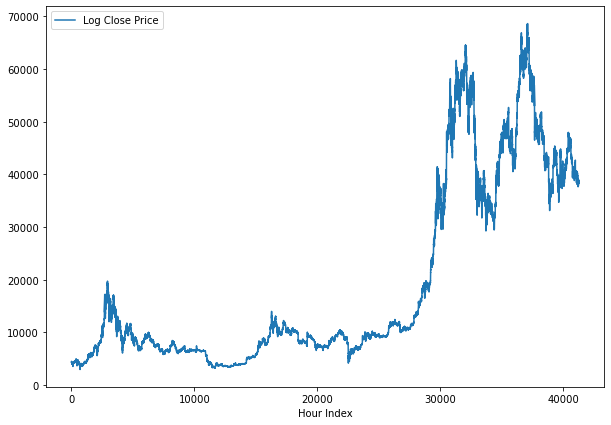

In [66]:
plt.figure(figsize=(10,7))
ax = plt.plot(df_)
plt.legend(["Log Close Price"])
plt.xlabel("Hour Index")

Text(0.5, 0, 'Hour Index')

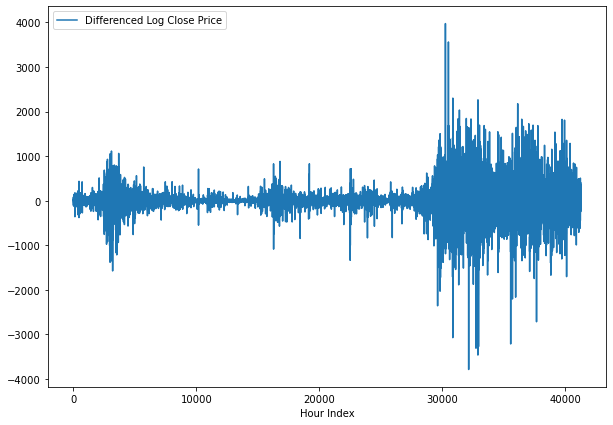

In [67]:
plt.figure(figsize=(10,7))
diff_df = np.diff(df_)
ax = plt.plot(diff_df)
plt.legend(["Differenced Log Close Price"])
plt.xlabel("Hour Index")

In [68]:
# model = pm.auto_arima(train,
# #                       start_p=10,
# #                       start_q=10,
#                       test='adf',       # use adftest to find optimal 'd'
# #                       max_p=10, 
# #                       max_q=10, 
#                       m=7,             # frequency of series
#                       d=None,           # let model determine 'd'
# #                       seasonal=False,   # No Seasonality
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)

In [69]:
# # model.summary()
# fc = model.predict(n_periods=-threshold)
# fc

In [70]:
# model = sm.tsa.arima.ARIMA(train, order = (4,1,4))
model = ARIMA(train, order=(4,1,4), seasonal_order=(0, 1, 0, 7))
fitted = model.fit()
fc = fitted.forecast(-threshold)
fc

C:\Users\Athra\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([1.16340117, 1.16351089, 1.15929075, 1.1594372 , 1.15890924,
       1.15781284, 1.16407093, 1.15749326, 1.15885763, 1.15503807,
       1.15551534, 1.15565456, 1.15492347, 1.16129312, 1.15499954,
       1.15663119, 1.15288621, 1.15346088, 1.15375573, 1.15309376,
       1.159494  , 1.1532733 , 1.15495993, 1.15122994, 1.15183214,
       1.15216197, 1.15151289, 1.15792197, 1.1517192 , 1.15341679,
       1.14969021, 1.15029986, 1.15063727, 1.14999063, 1.15640227,
       1.15020374, 1.15190345, 1.14817775, 1.14878932, 1.14912833,
       1.14848217, 1.15489453, 1.14869697, 1.15039709, 1.14667162,
       1.14728368, 1.14762301, 1.14697695, 1.15338951, 1.14719217,
       1.14889236, 1.14516696, 1.14577914, 1.14611853, 1.1454725 ,
       1.1518851 , 1.14568781, 1.14738802, 1.14366264, 1.14427484,
       1.14461425, 1.14396822, 1.15038084, 1.14418355, 1.14588376,
       1.14215839, 1.1427706 , 1.14311001, 1.14246398, 1.14887661,
       1.14267932, 1.14437953, 1.14065416, 1.14126637, 1.14160

In [74]:
appended_org = np.concatenate((train[-60:],test))
appended_fc = np.concatenate((train[-60:],fc))

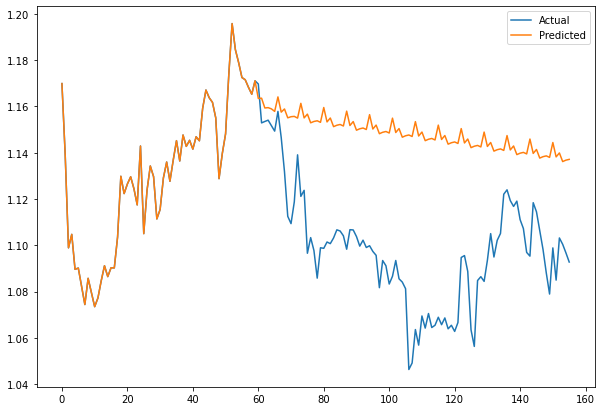

In [76]:
plt.figure(figsize=(10,7))
plt.plot(appended_org, label='Actual')
plt.plot(appended_fc, label='Predicted')
plt.legend()
plt.show()

In [73]:
RMSE = mean_squared_error(test, fc, squared=False)
MSE = mean_squared_error(test, fc)
MAE = mean_absolute_error(test, fc)
MAPE = mean_absolute_percentage_error(test, fc)
r2 = r2_score(test, fc)
print("RMSE " , RMSE)
print("MSE " ,MSE)
print("MAE " ,MAE)
print("MAPE " ,MAPE)
print(r2)

RMSE  0.054980225843826204
MSE  0.003022825233838135
MAE  0.0502063567980891
MAPE  0.04617844215220007
-3.7991728829702316
